<a href="https://colab.research.google.com/github/NafiulVega/Machine-Learning-TI-3E-2024/blob/main/21_Nafiul%20Alam%20Dary%20Vega/Jobsheet%2002/JS2_Nafiul%20Alam%20Dary%20Vega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Diri

*   Nama  : Nafi'ul Alam Dary Vega
*   NIM   : 2241720048
*   Kelas : TI - 3E
*   No    : 21



# Praktikum 1
Pra Pengolahan Data - Data Terstruktur

**Data Imputation**

Pada praktikum ini kita akan mencoba melakukan data imputation terhadap data yang hilang (missing value). Dataset yang digunakan adalah dataset Titanic.

**Langkah 1 - Load Data**

Import library yang dibutuhkan kemudian, load data kedalam DataFrame Pandas.

In [ ]:
import pandas as pd

data = 'Titanic-Dataset.csv' # path dataset
df = pd.read_csv(data) # load dataset

Berikut penjelasan kode:

1. import pandas as pd: Mengimpor library Pandas dan menamainya pd. Pandas digunakan untuk manipulasi dan analisis data.
2. data = 'Titanic-Dataset.csv': Menetapkan variabel data dengan nilai string 'Titanic-Dataset.csv'. String tersebut merupakan path ke file dataset.
3. df = pd.read_csv(data): Membaca dataset dari file CSV yang berada di path yang telah ditetapkan di variabel data, dan menyimpannya dalam DataFrame Pandas dengan nama df. DataFrame adalah struktur data tabular yang digunakan Pandas.

jika menggunakan colab, kita harus upload datanya dulu ke colab, baru kemudian bisa diakses

In [ ]:
# from google.colab import files
# uploaded = files.upload() # upload dataset

# import pandas as pd
# import io

# df = pd.read_csv(io.BytesIO(uploaded['Titanic-Dataset.csv'])) # load dataset

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


Tampilkan data teratas dengan perintah df.head()

Maka akan muncul tampilan seperti dibawah ini

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Berikut penjelasan kode:

1. df.head(): Menampilkan 5 baris teratas dari DataFrame df. Fungsi ini berguna untuk melihat sekilas isi dataset dan memastikan data telah termuat dengan benar.

**Langkah 2 - Pengecekan Data**

Lakukan pengecekan informasi mengenai data dengan menggunakan df.info()

Perhatikan hasil dari perintah yang telah dijalankan.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Berikut penjelasan kode:

1. df.info(): Menampilkan informasi ringkas tentang DataFrame df, seperti jumlah baris, nama kolom, jumlah data non-null di setiap kolom, dan tipe data setiap kolom. Fungsi ini berguna untuk memahami struktur dataset dan mengidentifikasi potensi masalah seperti missing values atau tipe data yang tidak sesuai.

Dari df.info() kita dapat mengetahui jumlah data untuk setiap kolom. Selain itu, kita mengetahui bahwa,

*   "Age" berjenis float64
*   "Cabin" berjenis object
*   "Embarked" berjenis object

***Pada Pandas, object sering kali mewaliki tipe data string. Kita harus cermat dalam hal ini. Hal ini berkaitan dengan teknik imputasi yang akan kita gunakan nantinya.***

Selanjutnya, untuk lebih mengetahui jumlah data yang hilang untuk setiap kolom, gunakan perintah,

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Berikut penjelasan kode:

1. df.isnull(): Mengecek setiap nilai di DataFrame df apakah merupakan missing value atau tidak.
2. .sum(): Menjumlahkan missing value di setiap kolom.
3. df.isnull().sum(): Menggabungkan kedua fungsi untuk menampilkan jumlah missing value di setiap kolom DataFrame df.

Dari informasi ini, kita dapat mengetahui data yang hilang sejumlah,

*   177 data "Age"
*   687 data "Cabin"
*   2 data "Embarked"



**Langkah 3 - Imputasi**

Pada langkah ini kita akan melakukan imputasi terdapat data yang hilang pada "Age", "Cabin", dan "Embarked".

Strategi yang akan kita gunakan adalah,

*   "Age" --> Dikarenakan "Age" adalah data nominal, maka kita akan menggunakan strategi mean.
*   "Cabin" --> "Cabin" merupakan informasi terkait dengan nomor kabin penumpang. Disini kita akan berasumsi bahwa, seluruh penumpang yang tidak memiliki nomor kabin, merupakan penumpang yang tinggal di dek-dek kapal. Sehingga kita akan mensubtitusi data yang hilang dengan informasi "DECK".
*   "Embarked" --> "Embarked" merupakan informasi lokasi embarkasi penumpang. Hanya ada 2 data yang hilang disini. Dikarenakan data merupakan data nominal, maka kita dapat menggunakan modus (mode) untuk mensubtitusi data yang hilang.



In [ ]:
# Age - mean
df['Age'].fillna(value=df['Age'].mean(), inplace=True)

# Cabin - "DECK"
df['Cabin'].fillna(value="DECK", inplace=True)

# Embarked - modus
df['Embarked'].fillna(value=df['Embarked'].mode, inplace=True)

Berikut penjelasan kode:

1. df['Age'].fillna(value=df['Age'].mean(), inplace=True): Mengisi missing value di kolom 'Age' dengan nilai rata-rata (mean) dari kolom tersebut. inplace=True berarti perubahan dilakukan langsung pada DataFrame df.
2. df['Cabin'].fillna(value="DECK", inplace=True): Mengisi missing value di kolom 'Cabin' dengan string "DECK". inplace=True berarti perubahan dilakukan langsung pada DataFrame df.
3. df['Embarked'].fillna(value=df['Embarked'].mode, inplace=True): Mengisi missing value di kolom 'Embarked' dengan modus (nilai yang paling sering muncul). Seharusnya kode ini adalah df['Embarked'].fillna(value=df['Embarked'].mode()[0], inplace=True). Perhatikan penambahan [0] di akhir df['Embarked'].mode. inplace=True berarti perubahan dilakukan langsung pada DataFrame df.

**Langkah 4 - Validasi Hasil**

Lakukan pengecekan kembali dengan df.info(). Selanjutnya, kita juga dapat memastikan kembali apakah nilai yang disikan sudah benar dengan melakukan pencekan data secara langsung. Hasil dari proses imputasi adalah sebagai berikut,

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Berikut penjelasan kode:

1. df.info(): Menampilkan informasi ringkas tentang DataFrame df, seperti jumlah baris, nama kolom, jumlah data non-null di setiap kolom, dan tipe data setiap kolom. Fungsi ini berguna untuk memahami struktur dataset dan mengidentifikasi potensi masalah seperti missing values atau tipe data yang tidak sesuai.

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,DECK,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,DECK,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,DECK,S


Berikut penjelasan kode:

1. df.head(): Menampilkan 5 baris teratas dari DataFrame df. Fungsi ini berguna untuk melihat sekilas isi dataset dan memastikan data telah termuat dengan benar.

# Praktikum 2
Seleksi Fitur, Encoding, dan Standarisasi

**Seleksi Fitur**

Pada tahap ini kita akan memilih variabel mana saja yang akan kita gunakan sebagai fitur. Pada bagian dasar teori, kita sudah mempelajari bahwa tidak selalu semua variabel dapat digunakan sebagai fitur. Oleh karena itu, kita dapat memilih fitur yang sekiranya penting untuk tujuan yang ingin kita capai dalam membuat model pembelajaran mesin. Kita akan menggunakan kasus yang sama, yaitu kita kita mengetahui ciri-ciri penumpang kapal Titanic yang selamat. Sehingga, fitur yang kita gunakan adalah,

1. "Survived"
2. "Pclass"
3. "Sex"
4. "Age"
5. "Cabin"

Kita akan memisahkan variabel-variabel tersebut dari variabel yang lain.

Data yang akan kita gunakan adalah data Titanic yang sudah diperbaiki dengan proses imputasi.

**Langkah 0 - Load Library**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

Berikut penjelasan kode:

1. import pandas as pd: Mengimpor library Pandas dan menamainya pd. Pandas digunakan untuk manipulasi dan analisis data.
2. from sklearn.preprocessing import LabelEncoder, StandardScaler: Mengimpor LabelEncoder dan StandardScaler dari modul sklearn.preprocessing.

  *   LabelEncoder digunakan untuk mengubah data kategorikal menjadi numerikal.
  *   StandardScaler digunakan untuk standarisasi data numerikal.

**Langkah 1 - Load Data**

In [ ]:
dpath = '/content/Titanic-Dataset-fixed.csv'
df = pd.read_csv(dpath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,DECK,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,DECK,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,DECK,S


Berikut penjelasan kode:

1. dpath = '/content/Titanic-Dataset-fixed.csv': Menetapkan variabel dpath dengan path ke file dataset yang sudah diperbaiki missing value-nya.
2. df = pd.read_csv(dpath): Membaca dataset dari file CSV di dpath dan menyimpannya dalam DataFrame Pandas bernama df.
3. df.head(): Menampilkan 5 baris teratas DataFrame df.

**Langkah 2 - Slice Data**

Pilih variabel yang kita anggap sebagai fitur

In [ ]:
df = df[['Survived', 'Pclass', 'Age', 'Sex', 'Cabin']]
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,22.0,male,DECK
1,1,1,38.0,female,C85
2,1,3,26.0,female,DECK
3,1,1,35.0,female,C123
4,0,3,35.0,male,DECK


Berikut penjelasan kode:

1. df = df[['Survived', 'Pclass', 'Age', 'Sex', 'Cabin']]: Membuat DataFrame baru df yang hanya berisi kolom 'Survived', 'Pclass', 'Age', 'Sex', dan 'Cabin' dari DataFrame df yang asli. Proses ini disebut feature selection, yaitu memilih fitur-fitur yang relevan untuk analisis.
2. df.head(): Menampilkan 5 baris teratas dari DataFrame df yang baru.

**Langkah 3 - Encoding**

Kita akan melakukan encoding pada data-data kategorikal, yaitu "Sex" dan "Cabin". Langkah ini perlu dilakukan karena algoritma pembelajaran mesin melakukan proses kalkulasi secara matematis. Strategi yang kita gunakan adalah Label Encoding. Label Encoding serupa dengan Ordinal Encoding, bedanya hanya pada proses pengurutan. Label Encoding tidak mengurutkan data terlebih dahulu.

In [ ]:
le = LabelEncoder() # membuat objek dari LabelEncoder
df['Sex'] = le.fit_transform(df['Sex']) # proses encoding
df['Cabin'] = le.fit_transform(df['Cabin']) # proses encoding

Berikut penjelasan kode:

1. le = LabelEncoder(): Membuat objek le dari kelas LabelEncoder.
2. df['Sex'] = le.fit_transform(df['Sex']): Melakukan label encoding pada kolom 'Sex'.

  *   fit_transform akan mempelajari nilai-nilai unik di kolom 'Sex' dan mengubahnya menjadi nilai numerik.
  *   Hasilnya disimpan kembali ke kolom 'Sex' di DataFrame df.

3. df['Cabin'] = le.fit_transform(df['Cabin']): Melakukan hal yang sama pada kolom 'Cabin'.

**Langkah 4 - Verifikasi Hasil**

Cek kembali dengan df.head(). Hasilnya akan seperti pada Gambar dibawah ini.

In [ ]:
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,22.0,1,115
1,1,1,38.0,0,81
2,1,3,26.0,0,115
3,1,1,35.0,0,55
4,0,3,35.0,1,115


Berikut penjelasan kode:

1. df.head(): Menampilkan 5 baris teratas dari DataFrame df yang baru.

**Langkah 5 - Standarisasi**

Pada tahapan ini kita akan melakukan standarisasi pada "Age". Hal ini sebetulnya tidak terlalu diperlukan karena nilai pada "Age" tidak terlalu jauh. Tujuan dari langkah ini adalah untuk demonstrasi proses standarisasi.

In [ ]:
std = StandardScaler()
df['Age'] = std.fit_transform(df[['Age']])

Berikut penjelasan kode:

1. std = StandardScaler(): Membuat objek std dari kelas StandardScaler. Objek ini akan digunakan untuk standarisasi data.
2. df['Age'] = std.fit_transform(df[['Age']]): Melakukan standarisasi data pada kolom 'Age'.

  *   fit_transform menghitung nilai rata-rata dan deviasi standar dari kolom 'Age'.
  *   Kemudian, data di kolom 'Age' diubah sehingga memiliki rata-rata 0 dan deviasi standar 1.
  *   Hasilnya disimpan kembali ke kolom 'Age' di DataFrame df.


**Langkah 6 - Verifikasi Hasil Standarisasi**

Cek kembali dengan df.head(). Hasilnya akan seperti pada Gambar dibawah ini.

In [ ]:
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


# Praktikum 3
Spliting Data

Pada pratikum ini, kita akan mencoba 3 macam strategi pembuatan data latih, validasi, dan uji. Data yang digunakan adalah data kapal Titanic yang sudah kita ekstraksi fiturnya pada pratikum sebelumnya

**Random Split**

**Langkah 1 - Load Data**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Titanic-Dataset-selected.csv')
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


Berikut penjelasan kode:

1. import pandas as pd: Mengimpor library Pandas dan menamainya pd. Pandas digunakan untuk manipulasi dan analisis data.
2. df = pd.read_csv('/content/Titanic-Dataset-selected.csv'): Membaca dataset dari file CSV yang berada di path /content/Titanic-Dataset-selected.csv dan menyimpannya dalam DataFrame Pandas bernama df.
3. df.head(): Menampilkan 5 baris teratas DataFrame df untuk melihat sekilas data.

**Langkah 2 - Split Data**

Hasilnya adalah sebagai berikut,

In [ ]:
# Split data
from sklearn.model_selection import train_test_split

# Split data training dan dan lainnya
# data lainnya, akan kita split lagi menjadi validasi dan testing.
# Rasio yang akan kita gunakan adalah 8:1:1
df_train, df_unseen = train_test_split(df, test_size=0.2, random_state=0)

# Split lagi antara validasi dan testing
df_val, df_test = train_test_split(df_unseen, test_size=0.5, random_state=0)

# Cek masing-masing ukuran data

print(f'Jumlah data asli: {df.shape[0]}')
print(f'Jumlah data train: {df_train.shape[0]}')
print(f'Jumlah data val: {df_val.shape[0]}')
print(f'Jumlah data test: {df_test.shape[0]}')

# Cek rasio tiap label
print('=========')
print(f'Jumlah label data asli:\n{df.Survived.value_counts()}')
print(f'Jumlah label data train:\n{df_train.Survived.value_counts()}')
print(f'Jumlah label data val:\n{df_val.Survived.value_counts()}')
print(f'Jumlah label data test:\n{df_test.Survived.value_counts()}')

Jumlah data asli: 891
Jumlah data train: 712
Jumlah data val: 89
Jumlah data test: 90
Jumlah label data asli:
Survived
0    549
1    342
Name: count, dtype: int64
Jumlah label data train:
Survived
0    439
1    273
Name: count, dtype: int64
Jumlah label data val:
Survived
0    53
1    36
Name: count, dtype: int64
Jumlah label data test:
Survived
0    57
1    33
Name: count, dtype: int64


Berikut penjelasan kode:

1. from sklearn.model_selection import train_test_split: Mengimpor fungsi train_test_split dari pustaka sklearn.model_selection, yang digunakan untuk membagi dataset menjadi beberapa subset.
2. df_train, df_unseen = train_test_split(df, test_size=0.2, random_state=0): Membagi dataset df menjadi dua bagian: df_train (80% dari data) dan df_unseen (20% dari data). Parameter test_size=0.2 menentukan proporsi data yang digunakan untuk bagian yang tidak terlihat. random_state=0 memastikan bahwa pembagian data berlangsung secara acak tetapi dapat direproduksi.
3. df_val, df_test = train_test_split(df_unseen, test_size=0.5, random_state=0): Selanjutnya, membagi dataset df_unseen menjadi dua bagian yang sama yaitu df_val dan df_test, masing-masing mendapatkan 50% dari df_unseen. Ini menghasilkan 10% dari total data untuk setiap subset.
4. print(f'Jumlah label data asli:\n{df.Survived.value_counts()}'): Mencetak jumlah label (jumlah setiap kategori) dari kolom Survived di dataset asli df. Metode value_counts() menghitung frekuensi setiap nilai dalam kolom tersebut.
5. print(f'Jumlah label data train:\n{df_train.Survived.value_counts()}'): Mencetak jumlah label dari kolom Survived di dataset pelatihan df_train, menggunakan metode value_counts() untuk mendapatkan frekuensi.
6. print(f'Jumlah label data val:\n{df_val.Survived.value_counts()}'): Mencetak jumlah label dari kolom Survived dalam dataset validasi df_val.
7. print(f'Jumlah label data test:\n{df_test.Survived.value_counts()}'): Mencetak jumlah label dari kolom Survived di dataset pengujian df_test.

Secara keseluruhan, kode ini membagi dataset menjadi tiga bagian (train, validation, dan test) dan kemudian mencetak jumlah label untuk setiap bagian untuk mengevaluasi distribusi data.

**Stratified Split**

**Langkah 1 - Load Data**

In [ ]:
import pandas as pd

df2 = pd.read_csv('/content/Titanic-Dataset-selected.csv')
df2.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


Berikut penjelasan kode:

1. import pandas as pd: Mengimpor library Pandas dan menamainya pd. Pandas digunakan untuk manipulasi dan analisis data.
2. df2 = pd.read_csv('/content/Titanic-Dataset-selected.csv'): Membaca dataset dari file CSV yang berada di path /content/Titanic-Dataset-selected.csv dan menyimpannya dalam DataFrame Pandas bernama df.
3. df2.head(): Menampilkan 5 baris teratas DataFrame df2 untuk melihat sekilas data.

**Langkah 2 - Split Data**

Hasilnya adalah sebagai berikut. Perhatikan rasio-rasio yang dihasilkan.

In [ ]:
# Split data
from sklearn.model_selection import train_test_split

# Split data training dan dan lainnya
# data lainnya, akan kita split lagi menjadi validasi dan testing.
# Rasio yang akan kita gunakan adalah 8:1:1
df2_train, df2_unseen = train_test_split(df2, test_size=0.2, random_state=0, stratify=df['Survived'])

# Split lagi antara validasi dan testing
df2_val, df2_test = train_test_split(df2_unseen, test_size=0.5, random_state=0, stratify=df_unseen['Survived'])

# Cek masing-masing ukuran data

print(f'Jumlah label data asli:\n{df2.Survived.value_counts()}')
print(f'Jumlah label data train:\n{df2_train.Survived.value_counts()}')
print(f'Jumlah label data val:\n{df2_val.Survived.value_counts()}')
print(f'Jumlah label data test:\n{df2_test.Survived.value_counts()}')

Jumlah label data asli:
Survived
0    549
1    342
Name: count, dtype: int64
Jumlah label data train:
Survived
0    439
1    273
Name: count, dtype: int64
Jumlah label data val:
Survived
0    51
1    38
Name: count, dtype: int64
Jumlah label data test:
Survived
0    59
1    31
Name: count, dtype: int64


Berikut penjelasan kode:

1. from sklearn.model_selection import train_test_split: Mengimport statement yang digunakan untuk mengambil fungsi train_test_split dari pustaka sklearn. Fungsi ini berguna untuk membagi dataset menjadi subset yang berbeda.
2. df2_train, df2_unseen = train_test_split(df2, test_size=0.2, random_state=0, stratify=df['Survived']): Membagi dataset df2 menjadi dua bagian: df2_train (data training) dan df2_unseen (data yang belum terlihat). Parameter test_size=0.2 menunjukkan bahwa 20% data akan dipisahkan untuk data yang tidak terlihat, dan 80% untuk data training. random_state=0 digunakan untuk memastikan bahwa hasil pembagian akan konsisten setiap kali dijalankan. stratify=df['Survived'] memastikan bahwa proporsi label 'Survived' tetap seimbang dalam kedua subset.
3. df2_val, df2_test = train_test_split(df2_unseen, test_size=0.5, random_state=0, stratify=df_unseen['Survived']): Membagi dataset df2_unseen menjadi dua bagian lagi: df2_val (data validasi) dan df2_test (data testing). Parameter test_size=0.5 menunjukkan bahwa 50% dari df2_unseen akan menjadi data validasi dan 50% akan menjadi data testing. Dengan menggunakan stratify=df_unseen['Survived'], proporsi label 'Survived' tetap seimbang dalam kedua subset ini juga.
4. print(f'Jumlah label data asli:\n{df2.Survived.value_counts()}'): Mencetak jumlah label unik dalam dataset asli df2 dengan fungsi value_counts(), yang menghitung jumlah kemunculan setiap label dalam kolom 'Survived'.
5. print(f'Jumlah label data train:\n{df2_train.Survived.value_counts()}'): Mencetak jumlah label di subset data training df2_train.
6. print(f'Jumlah label data val:\n{df2_val.Survived.value_counts()}'): Mencetak jumlah label di subset data validasi df2_val.
7. print(f'Jumlah label data test:\n{df2_test.Survived.value_counts()}'): Mencetak jumlah label di subset data testing df2_test.

**Cross Validation 1**

Pada praktikum ini, kita akan membuat data latih dan data uji saja dengan menggunakan metode cross validation.

**Langkah 1 - Load Data**

In [ ]:
import pandas as pd

df3 = pd.read_csv('/content/Titanic-Dataset-selected.csv')
df3.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


Berikut penjelasan kode:

1. import pandas as pd: Mengimpor library Pandas dan menamainya pd. Pandas digunakan untuk manipulasi dan analisis data.
2. df3 = pd.read_csv('/content/Titanic-Dataset-selected.csv'): Membaca dataset dari file CSV yang berada di path /content/Titanic-Dataset-selected.csv dan menyimpannya dalam DataFrame Pandas bernama df.
3. df3.head(): Menampilkan 5 baris teratas DataFrame df3 untuk melihat sekilas data.

**Langkah 2 - Split Data**

Perhatikan nomor index untuk setiap fold. Jika berhasil, maka seharusnya setiap fold memiliki nomor index yang berbeda untuk setiap data latih dan data uji.

Berikut hasilnya untuk 2 fold pertama.

In [ ]:
# Implementasi k-fold cross validation (random) dengan training dan testing saja
from sklearn.model_selection import KFold

# inisiasi obyek kfold
kf = KFold(n_splits=4)
print(f'Jumlah fold: {kf.get_n_splits()}')
print(f'Obyek KFold: {kf}')

# Lakukan splitting dengan KFold
kf_split = kf.split(df3)
print(f'Jumlah data df: {df.shape[0]}')

# cek index data tiap fold
for train_index, test_index in kf_split:
    print(f'Index train: {train_index} | Index test: {test_index}')

Jumlah fold: 4
Obyek KFold: KFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df: 891
Index train: [223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330
 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348
 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366
 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384
 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402
 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420
 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438
 439 440 44

Berikut penjelasan kode:

1. from sklearn.model_selection import KFold: Mengimpor kelas KFold dari modul model_selection dalam pustaka scikit-learn. KFold digunakan untuk membagi dataset menjadi k bagian (fold) yang akan digunakan dalam validasi silang.
2. kf = KFold(n_splits=4): Membuat instansi dari KFold dengan parameter n_splits=4, artinya dataset akan dibagi menjadi 4 fold. Ini berarti bahwa model akan dilatih sebanyak 4 kali, masing-masing kali dengan menggunakan satu fold sebagai data uji dan 3 fold lainnya sebagai data latih.
3. print(f'Jumlah fold: {kf.get_n_splits()}'): Mencetak jumlah fold yang telah ditentukan (yaitu 4) dengan menggunakan metode get_n_splits() dari objek KFold.
4. print(f'Obyek KFold: {kf}'): Mencetak representasi string dari objek KFold yang telah dibuat. Ini menampilkan detail tentang konfigurasi KFold.
5. kf_split = kf.split(df3): Menggunakan metode split() dari objek KFold untuk menghasilkan indeks dari data latih dan data uji. df3 adalah dataframe yang berisi dataset yang akan digunakan untuk validasi silang. kf.split() mengembalikan generator yang menghasilkan pasangan indeks untuk data latih dan data uji di setiap fold.
6. print(f'Jumlah data df: {df.shape[0]}'): Mencetak jumlah total data di dataframe df dengan menggunakan shape[0], yang memberikan jumlah baris (data) dalam dataframe.
7. for train_index, test_index in kf_split:: Memulai loop yang iterasi melalui generator kf_split. Di setiap iterasi, train_index dan test_index akan berisi indeks dari data latih dan data uji untuk fold saat ini.
8. print(f'Index train: {train_index} | Index test: {test_index}'): Mencetak indeks dari data latih dan data uji untuk setiap fold. Ini memungkinkan kita untuk mengetahui bagian mana dari dataset yang digunakan untuk pelatihan dan pengujian di setiap iterasi.

**Cross Validation 2**

Pada pratikum ini, kita sedikit melakukan pendekatan yang berbeda dibandingkan dengan praktikum sebelumnya. Pertama data akan kita split menjadi data latih dan data uji. Kemudian, data latih kita split menjadi beberapa bagian dengan cross validation untuk kebutuhan data latih dan data validasi.

**Langkah 1 - Load Data**

In [ ]:
import pandas as pd

df4 = pd.read_csv('/content/Titanic-Dataset-selected.csv')
df4.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


Berikut penjelasan kode:

1. import pandas as pd: Mengimpor library Pandas dan menamainya pd. Pandas digunakan untuk manipulasi dan analisis data.
2. df4 = pd.read_csv('/content/Titanic-Dataset-selected.csv'): Membaca dataset dari file CSV yang berada di path /content/Titanic-Dataset-selected.csv dan menyimpannya dalam DataFrame Pandas bernama df.
3. df4.head(): Menampilkan 5 baris teratas DataFrame df4 untuk melihat sekilas data.

**Langkah 2 - Split Data**

Hasilnya, pada jumlah data latih seharusnya berkurang karena telah kita split pada tahap awal. Berikut merupakan hasil untuk 2 fold pertama.

In [ ]:
# Implementasi k-fold cross validation (random) dengan training, validation, dan testing data
from sklearn.model_selection import train_test_split, KFold

# Split dulu antara data training dan testing dengan train_test_split
# Rasio 8:2 untuk training dan testing
df4_train, df4_test = train_test_split(df4, test_size=0.2, random_state=0)

# inisiasi obyek kfold
kf2 = KFold(n_splits=4)
print(f'Jumlah fold: {kf2.get_n_splits()}')
print(f'Obyek KFold: {kf2}')

# Lakukan splitting dengan KFold untuk data df_training
# Dengan acara ini, kita masih memiliki data testing untuk keperluan pengujian model
# namun tetap dapat melakukan evaluasi dengan menggunakan data validasi
kf2_split = kf2.split(df_train)
print(f'Jumlah data df_train: {df4_train.shape[0]}')

# cek index data tiap fold
for train_index, test_index in kf2_split:
    print(f'Index train: {train_index} | Index test: {test_index}')

Jumlah fold: 4
Obyek KFold: KFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df_train: 712
Index train: [178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321
 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339
 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357
 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375
 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393
 394 

Berikut penjelasan kode:

1. from sklearn.model_selection import train_test_split, KFold: Mengimpor fungsi train_test_split dan kelas KFold dari modul model_selection di scikit-learn. train_test_split digunakan untuk membagi dataset menjadi subsets training dan testing, sedangkan KFold digunakan untuk mendefinisikan pembagian k-fold.
2. df4_train, df4_test = train_test_split(df4, test_size=0.2, random_state=0): Melakukan pembagian dataset df4 menjadi dua bagian: df4_train untuk data pelatihan (80% dari data) dan df4_test untuk data pengujian (20% dari data). Parameter random_state=0 memastikan bahwa pembagian ini dapat direproduksi di lain waktu dengan hasil yang sama.
3. kf2 = KFold(n_splits=4): Menginisiasi objek kf2 sebagai instans dari kelas KFold dengan parameter n_splits=4, yang berarti data pelatihan akan dibagi menjadi 4 fold (lipatan) untuk melakukan cross-validation.
4. print(f'Jumlah fold: {kf2.get_n_splits()}'): Mencetak jumlah fold yang telah ditentukan, yaitu 4. Metode get_n_splits() mengembalikan jumlah fold yang telah ditentukan saat inisialisasi objek KFold.
5. … print(f'Index train: {train_index} | Index test: {test_index}'): Di dalam loop yang iterasi pada objek kf2.split(df4_train), akan mencetak indeks dari data pelatihan dan pengujian untuk setiap fold. train_index berisi indeks untuk data pelatihan, sedangkan test_index berisi indeks untuk data pengujian pada fold tersebut.

# Praktikum 4
Ekstraksi Fitur Data Tidak Terstruktur

Pada pratikum ini, kita akan mencoba untuk mengekstraksi fitur dari sebuah citra. Proses yang akan kita lakukan hanya proses sederhana. Pembahasan lengkap terkait dengan pra pengolahan data dan ekstraksi fitur pada data citra akan dibahas pada perkuliahan pengolahan citra digital.

Data yang akan kita gunakan adalah citra berikut.
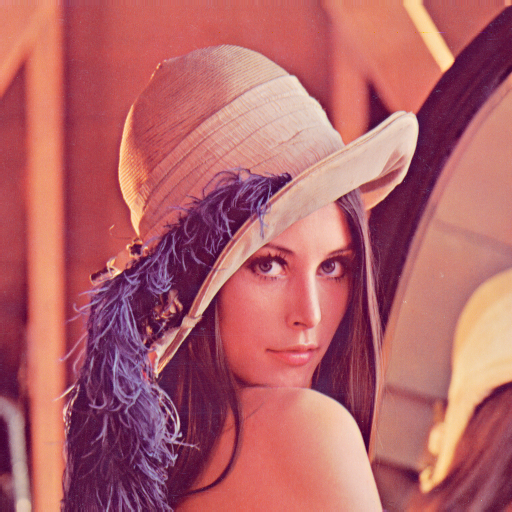

**Langkah 0 - Instal Library**

Pada praktikum ini kita akan menggunakan library pillow. Tambahan pillow terlebih dahulu apabila belum terinstal didalam perangkat yang Anda gunakan.

Jalan perintah berikut pada notebook

In [ ]:
!pip install Pillow

Berikut penjelasan kode:

1. !pip install Pillow: Menginstall library Pillow. Library ini biasanya digunakan untuk memproses gambar. "!" di awal baris menunjukkan bahwa perintah ini dijalankan sebagai command line di Google Colab.

**Langkah 1 - Load Image**

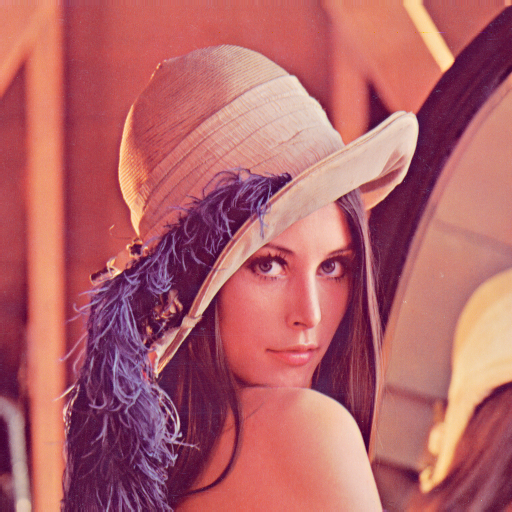

In [ ]:
from PIL import Image

img = Image.open('/content/Lenna_(test_image).png')
img.show() # tampilkan gambar
display(img) # metode alternatif tampilkan gambar

Berikut penjelasan kode:

1. from PIL import Image: Mengimpor modul Image dari library PIL (Pillow). Modul ini menyediakan fungsi untuk memanipulasi gambar.
2. img = Image.open('/content/Lenna_(test_image).png'): Membuka gambar yang berada di path /content/Lenna_(test_image).png menggunakan fungsi Image.open() dan menyimpannya dalam variabel img.
3. img.show(): Menampilkan gambar dengan menggunakan aplikasi image viewer bawaan sistem operasi.
4. display(img): Menampilkan gambar di notebook. Ini adalah metode alternatif untuk menampilkan gambar di lingkungan notebook.

**Langkah 2 - Ekstrak Fitur**

Anda akan mendapatkan nilai histogram dalam bentuk array

In [ ]:
# Ekstrak setiap channel red, green, blue
r, g, b = img.split()

# Cek panjang ukuran channel red
print(len(r.histogram()))

# Cetak fitur histogram pada channel red
print(r.histogram())

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 8, 6, 10, 9, 20, 37, 32, 41, 53, 74, 103, 132, 179, 193, 242, 238, 336, 386, 404, 483, 607, 628, 771, 785, 1001, 1016, 1177, 1269, 1332, 1446, 1487, 1457, 1574, 1585, 1591, 1557, 1569, 1660, 1648, 1420, 1559, 1418, 1384, 1319, 1342, 1156, 1120, 955, 969, 828, 782, 752, 737, 719, 700, 628, 673, 587, 617, 610, 592, 557, 593, 552, 566, 582, 559, 571, 520, 664, 650, 618, 730, 594, 667, 675, 685, 771, 715, 667, 740, 744, 766, 765, 772, 817, 817, 744, 806, 760, 777, 812, 797, 799, 861, 814, 910, 907, 918, 888, 1011, 879, 996, 912, 952, 884, 1074, 977, 1073, 1040, 1216, 1250, 1403, 1534, 1639, 1682, 1776, 1874, 1769, 1582, 1743, 1441, 1477, 1483, 1409, 1437, 1449, 1389, 1479, 1592, 1655, 1657, 1666, 1857, 1896, 1813, 1979, 1814, 1956, 1928, 2055, 2012, 2303, 2333, 2670, 2787, 3232, 3154, 3476, 3424, 3516, 3102, 31

Berikut penjelasan kode:

1. r, g, b = img.split(): Memisahkan gambar img menjadi tiga channel warna: merah (r), hijau (g), dan biru (b).
2. print(len(r.histogram())): Mencetak panjang dari histogram channel merah. Histogram berisi informasi tentang distribusi intensitas warna dalam gambar.
3. print(r.histogram()): Mencetak nilai-nilai histogram dari channel merah. Setiap nilai mewakili jumlah piksel dengan intensitas warna tertentu.

# Tugas Praktikum
Wisconsin Breast Cancer

**Deskripsi Tugas**

Pada tugas pratikum ini Anda akan menggunakan data "Wisconsin Breast Cancer". Data tersebut terdiri dari 569 data yang digunakan untuk mendiagnonis jenis kanker Malignant (M) dan Benign (B). Tugas Anda adalah,
1. Pisahkan antara variabel yang dapat digunakan dan variabel yang tidak dapat digunakan.
2. Lakukan proses encoding pada kolom "diagnosis".
3. Lakukan proses standarisasi pada semua kolom yang memiliki nilai numerik.
4. Lakukan proses stratified split data untuk membuat data latih dan data uji dengan rasio 80:20.

**0. Melakukan Load Data**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

df5 = pd.read_csv('/content/wbc.csv')
df5.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Pengecekan Data

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**1. Pisahkan antara variabel yang dapat digunakan dan variabel yang tidak dapat digunakan.**

In [ ]:
df5 = df5.drop(['id', 'Unnamed: 32'], axis=1) # untuk menghapus kolom yang tidak digunakan
df5.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**2. Lakukan proses encoding pada kolom "diagnosis".**

In [ ]:
le = LabelEncoder() # membuat objek dari LabelEncoder
df5['diagnosis'] = le.fit_transform(df5['diagnosis']) # proses encoding
df5.head(n=100)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,0.2095,...,24.22,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368
96,0,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,0.1900,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376
97,0,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,0.1350,...,10.92,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988
98,0,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,0.1620,...,13.06,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756


**3. Lakukan proses standarisasi pada semua kolom yang memiliki nilai numerik.'**

In [ ]:
# Identifikasi semua kolom numerik
numerical_cols = df5.select_dtypes(include=['float64', 'int64']).columns

# Inisiasi objek StandardScaler
std = StandardScaler()

# Lakukan standarisasi pada kolom numerik
df5[numerical_cols] = std.fit_transform(df5[numerical_cols])

# Menampilkan 5 baris pertama dari dataset setelah standarisasi
df5.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.297676,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.297676,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.297676,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1.297676,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.297676,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


**4. Lakukan proses stratified split data untuk membuat data latih dan data uji dengan rasio 80:20.**

In [ ]:
# Split data
from sklearn.model_selection import train_test_split

# Split data dengan rasio 8:2 dengan strata kolom diagnosis
df5_train, df5_test = train_test_split(df5, test_size=0.2, random_state=0, stratify=df5['diagnosis'])

# Cek masing-masing ukuran data
print(f'Jumlah label data asli:\n{df5.diagnosis.value_counts()}')
print(f'Jumlah label data train:\n{df5_train.diagnosis.value_counts()}')
print(f'Jumlah label data test:\n{df5_test.diagnosis.value_counts()}')

Jumlah label data asli:
diagnosis
-0.770609    357
 1.297676    212
Name: count, dtype: int64
Jumlah label data train:
diagnosis
-0.770609    285
 1.297676    170
Name: count, dtype: int64
Jumlah label data test:
diagnosis
-0.770609    72
 1.297676    42
Name: count, dtype: int64
